# Getting Started

Seems to be that the best Buffer Size is 128


And the best SR is 16000


Seems like the ideal Resistor is 47K, but hard to tell. Need to try it with a 5V power supply and maybe a new microphone see if that helps. 

In [1]:
import librosa
audio_path = 'AudioSamples/snappingTest.wav'
x , sr = librosa.load(audio_path)
print(type(x), type(sr))

<class 'numpy.ndarray'> <class 'int'>


Update sr to match the sample rate you chose when recording. If you're not sure, check the "RecordingwTMRpcm.ino" file on line 58, it's the second parameter in the function call. 

In [2]:
librosa.load(audio_path, sr=16000)

(array([0.21875, 0.21875, 0.21875, ..., 0.21875, 0.21875, 0.21875],
       dtype=float32),
 16000)

In [3]:
import IPython.display as ipd
ipd.Audio(audio_path)

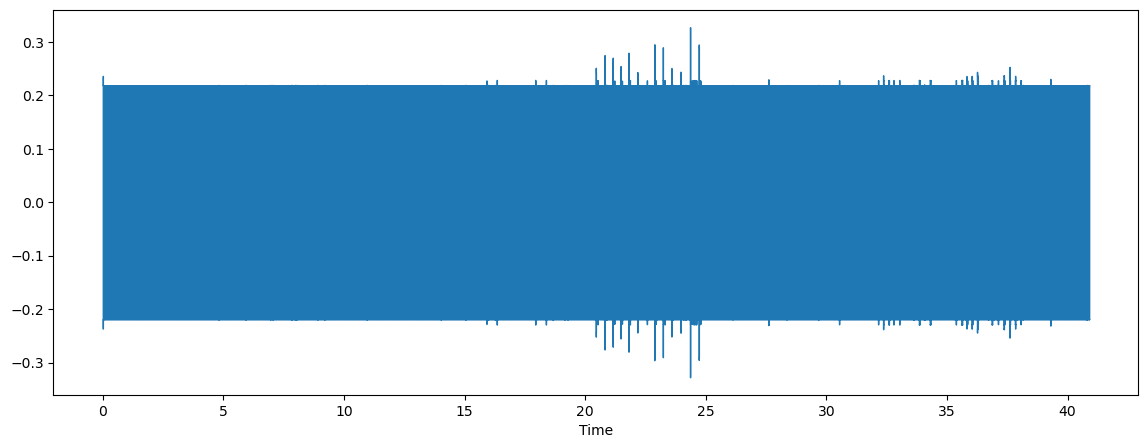

In [4]:
#display waveform
%matplotlib inline
import matplotlib.pyplot as plt
import librosa.display
plt.figure(figsize=(14, 5))
librosa.display.waveshow(x, sr=sr)

# Noise Reduction

Had to run following commands:


pip install noisereduce


pip install torch

In [5]:
from scipy.io import wavfile
import noisereduce as nr
# load data
rate, data = wavfile.read("AudioSamples/snappingTest.wav")
# perform noise reduction
reduced_noise = nr.reduce_noise(y=data, sr=rate)
wavfile.write("mywav_reduced_noise.wav", rate, reduced_noise)

In [6]:
import librosa
audio_path = 'mywav_reduced_noise.wav'
x , sr = librosa.load(audio_path)
print(type(x), type(sr))

<class 'numpy.ndarray'> <class 'int'>


In [7]:
librosa.load(audio_path, sr=16000)

(array([-0.46875  , -0.46875  , -0.4921875, ..., -0.4921875, -0.484375 ,
        -0.4765625], dtype=float32),
 16000)

In [8]:
import IPython.display as ipd
ipd.Audio(audio_path)

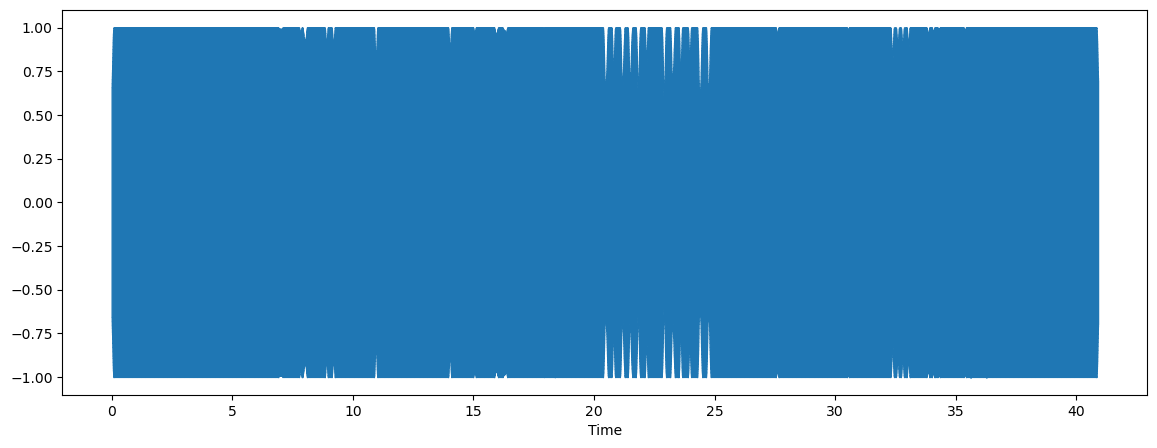

In [9]:
#display waveform
%matplotlib inline
import matplotlib.pyplot as plt
import librosa.display
plt.figure(figsize=(14, 5))
librosa.display.waveshow(x, sr=sr)

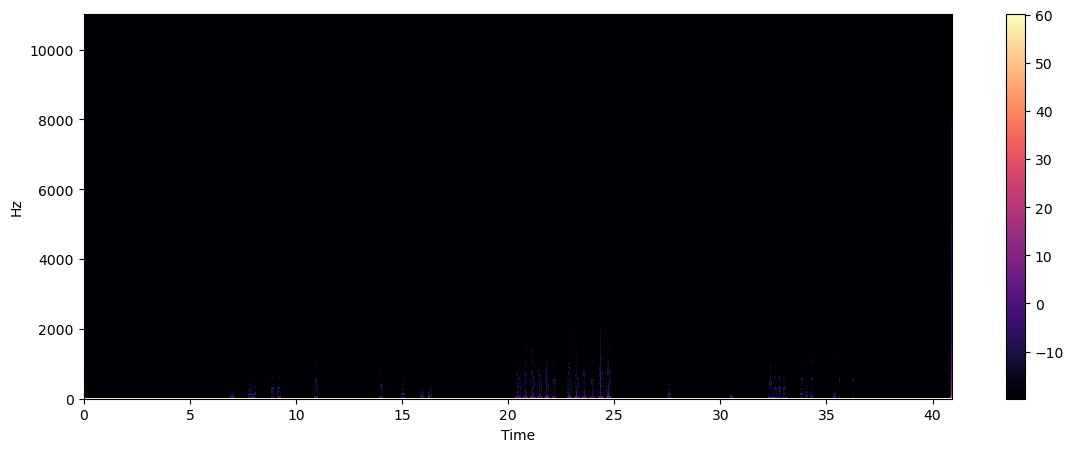

In [10]:
# This .stft is a SHORT term fast fourier transform
#display Spectrogram
X = librosa.stft(x)
Xdb = librosa.amplitude_to_db(abs(X))
plt.figure(figsize=(14, 5))
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz') 
#If to pring log of frequencies  
#librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='log')
plt.colorbar()

# Feature Extraction

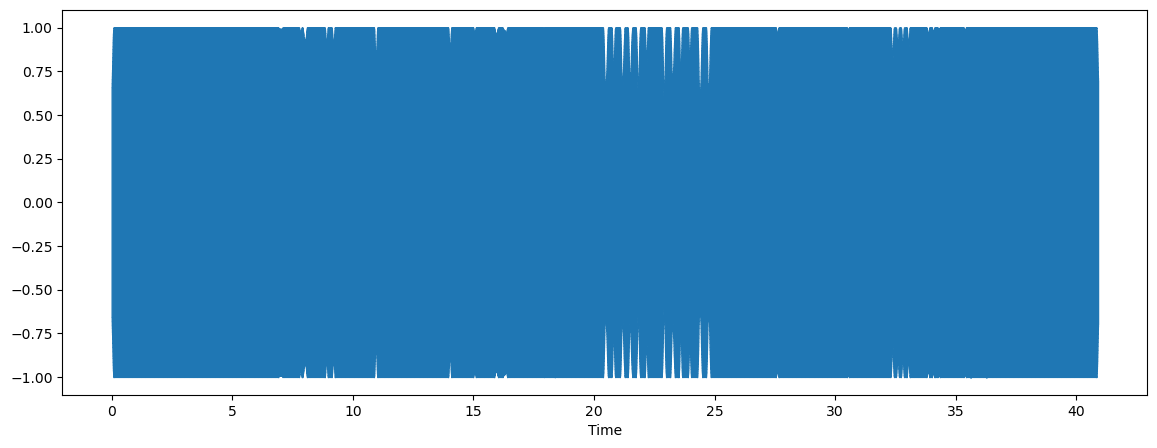

In [11]:
x, sr = librosa.load(audio_path)
#Plot the signal:
plt.figure(figsize=(14, 5))
librosa.display.waveshow(x, sr=sr)

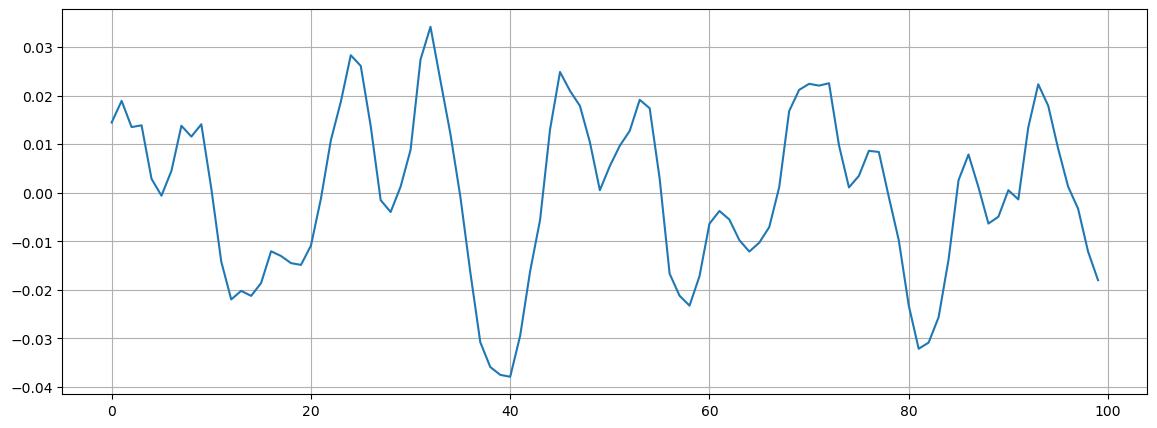

In [7]:
# Zooming in
n0 = 9000
n1 = 9100
plt.figure(figsize=(14, 5))
plt.plot(x[n0:n1])
plt.grid()

## Zero Crossing

In [8]:
zero_crossings = librosa.zero_crossings(x[n0:n1], pad=False)
print(sum(zero_crossings))

17


## Spectral Centroid

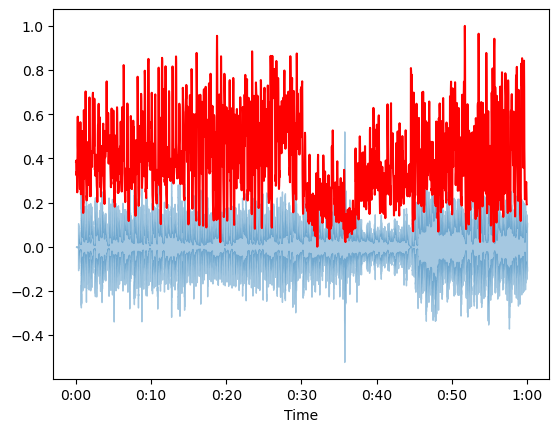

In [9]:
#spectral centroid -- centre of mass -- weighted mean of the frequencies present in the sound
import sklearn
from sklearn import preprocessing
spectral_centroids = librosa.feature.spectral_centroid(y=x, sr=sr)[0]
spectral_centroids.shape
# Computing the time variable for visualization
frames = range(len(spectral_centroids))
t = librosa.frames_to_time(frames)
# Normalising the spectral centroid for visualisation
def normalize(x, axis=0):
    return sklearn.preprocessing.minmax_scale(x, axis=axis)
#Plotting the Spectral Centroid along the waveform
librosa.display.waveshow(x, sr=sr, alpha=0.4)
plt.plot(t, normalize(spectral_centroids), color='r')

## Spectral Rolloff

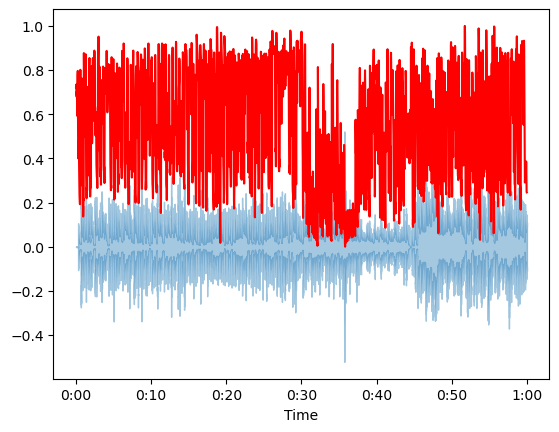

In [10]:
spectral_rolloff = librosa.feature.spectral_rolloff(y=x, sr=sr)[0]
librosa.display.waveshow(x, sr=sr, alpha=0.4)
plt.plot(t, normalize(spectral_rolloff), color='r')

## MFCC — Mel-Frequency Cepstral Coefficients

By printing the shape of mfccs you get how many mfccs are calculated on how many frames. The first value represents the number of mfccs calculated and another value represents a number of frames available.

(20, 2584)


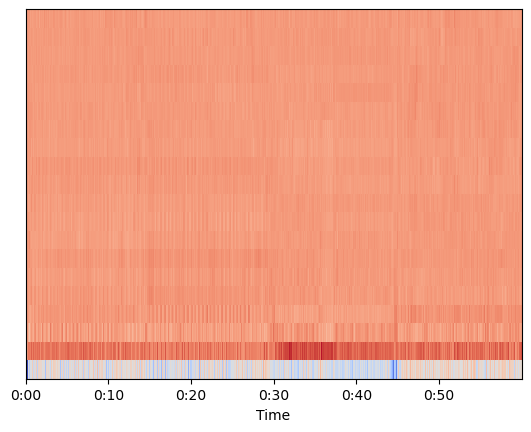

In [11]:
mfccs = librosa.feature.mfcc(y=x, sr=sr)
print(mfccs.shape)
#Displaying  the MFCCs:
librosa.display.specshow(mfccs, sr=sr, x_axis='time')

## Spectral Entropy

In [12]:
import numpy as np
import ms_entropy as me

# need to figure out how to convert the mfccs into a 2D numpy array

entropy = me.calculate_spectral_entropy(x)

print()

AssertionError: The input spectrum must be a 2D numpy array with shape (n, 2).